In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(
    r"C:\Users\Mangtay\Desktop\DataScience\MachineLearning\Datasets\12-health_risk_classification.csv"
)


In [4]:
df.head()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
0,0.564223,0.652825,1.262925,1
1,-1.692569,2.981229,-0.180331,1
2,0.770383,0.400475,1.365806,1
3,2.135007,0.150832,3.084596,0
4,0.360342,1.026132,1.251574,1


In [5]:
df.describe()

,bmi_score,blood_pressure_variation,activity_level_index,high_risk_flag
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.023702,0.016769,-0.020771,0.498000
std,1.203694,1.268761,1.392738,0.500246
min,-4.743951,-2.587178,-4.999018,0.000000
25%,-0.796655,-0.981320,-1.057938,0.000000
50%,0.142105,-0.317137,0.204506,0.000000
75%,0.956225,1.017388,1.061181,1.000000
max,2.321480,3.954873,3.477210,1.000000


In [6]:
df.columns

Index(['bmi_score', 'blood_pressure_variation', 'activity_level_index',
       'high_risk_flag'],
      dtype='object')

In [7]:
#Buradkai data scale edilmiş halde

<Axes: xlabel='blood_pressure_variation', ylabel='activity_level_index'>

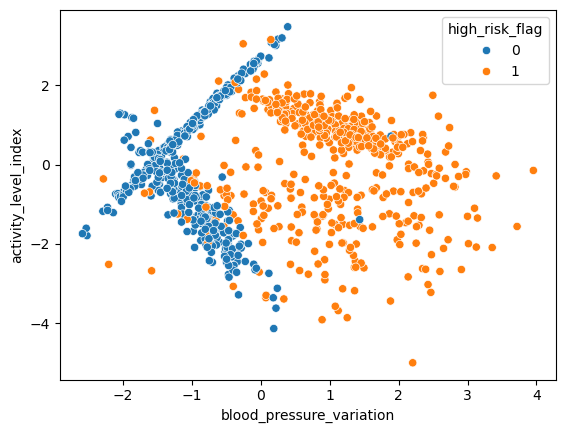

In [10]:
sns.scatterplot(x=df["blood_pressure_variation"],y=df["activity_level_index"],hue=df["high_risk_flag"])

In [12]:
df["high_risk_flag"].value_counts()


high_risk_flag
0    502
1    498
Name: count, dtype: int64

In [16]:
X = df.drop("high_risk_flag",axis=1)
y = df["high_risk_flag"]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=15,test_size=0.25)

In [18]:
#burada scale önemli

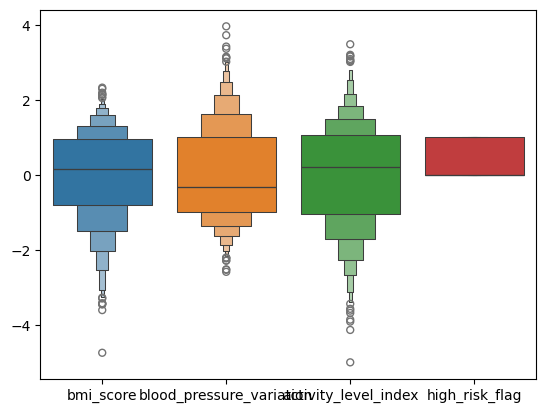

In [19]:
sns.boxenplot(df)
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
classifier = KNeighborsClassifier(n_neighbors=10,n_jobs=-1,algorithm="auto",weights="uniform")

In [30]:
classifier.fit(X_train_scaled,y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


In [40]:
y_pred = classifier.predict(X_test_scaled)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [42]:
score=accuracy_score(y_pred,y_test)
print("score: ", score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n " , confusion_matrix(y_pred,y_test))

score:  0.952
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       134
           1       0.92      0.98      0.95       116

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

confusion matrix: 
  [[124  10]
 [  2 114]]


In [51]:
classifier = KNeighborsClassifier(n_neighbors=6,n_jobs=-1,algorithm="kd_tree",weights="uniform")

In [52]:
classifier.fit(X_train_scaled,y_train)

,n_neighbors,6
,weights,'uniform'
,algorithm,'kd_tree'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


In [53]:
y_pred = classifier.predict(X_test_scaled)

In [54]:
score=accuracy_score(y_pred,y_test)
print("score: ", score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n " , confusion_matrix(y_pred,y_test))

score:  0.956
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       135
           1       0.92      0.99      0.95       115

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

confusion matrix: 
  [[125  10]
 [  1 114]]


In [57]:
df_reg = pd.read_csv(
    r"C:\Users\Mangtay\Desktop\DataScience\MachineLearning\Datasets\12-house_energy_regression.csv"
)


In [58]:
df_reg.head()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
0,-0.167118,0.146714,-14.996950
1,-0.020902,0.117327,-12.678089
2,0.150419,0.364961,17.775455
3,0.555604,0.089581,6.661465
4,0.058209,-1.142970,-14.195530


In [59]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   avg_indoor_temp_change        1000 non-null   float64
 1   outdoor_humidity_level        1000 non-null   float64
 2   daily_energy_consumption_kwh  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [60]:
df_reg.describe()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
count,1000.000000,1000.000000,1000.000000
mean,0.033186,0.056982,1.766025
std,0.961603,1.014959,41.299085
min,-3.241267,-2.940389,-132.797922
25%,-0.611581,-0.651418,-25.600072
50%,0.036043,0.047742,1.065474
75%,0.648317,0.714886,28.766573
max,3.078881,3.852731,138.577662


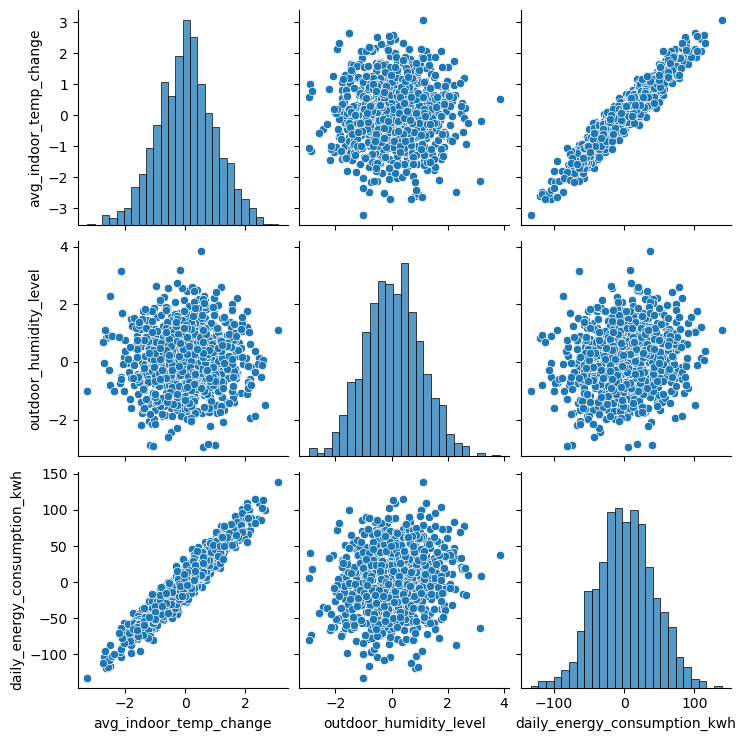

In [61]:
sns.pairplot(df_reg)
plt.show()

In [62]:
df_reg.corr()

,avg_indoor_temp_change,outdoor_humidity_level,daily_energy_consumption_kwh
avg_indoor_temp_change,1.000000,0.002584,0.956682
outdoor_humidity_level,0.002584,1.000000,0.169557
daily_energy_consumption_kwh,0.956682,0.169557,1.000000


In [63]:
X = df_reg.drop("daily_energy_consumption_kwh",axis=1)
y = df_reg["daily_energy_consumption_kwh"]

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=15,test_size=0.25)

In [65]:
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
from sklearn.neighbors import KNeighborsRegressor

In [68]:
regressor = KNeighborsRegressor(n_jobs=-1,n_neighbors=5,algorithm="auto")

In [69]:
regressor.fit(X_train_scaled,y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


In [70]:
y_pred = regressor.predict(X_test_scaled)

In [71]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [73]:
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
print("MSE: ",MSE)
print("MAE: ", MAE)
print("R2: ", RMSE)

MSE:  135.6610827281179
MAE:  9.228754406902722
R2:  11.647363767313095
